In [1]:
%matplotlib inline

import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

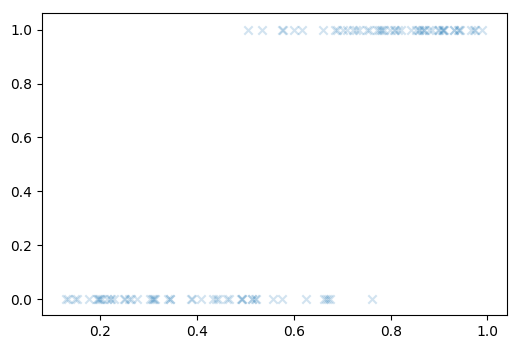

In [2]:
n_samples = 100
prior0 = 0.5
prior1 = 1-prior0
a0 = 3.0
b0 = 5.0
a1 = 8.0
b1 = 2.0
pos_x = np.random.beta(a0, b0, int(n_samples*prior0))
neg_x = np.random.beta(a1, b1, int(n_samples*prior1))

x = np.hstack((pos_x, neg_x))
y = np.hstack((np.zeros(int(n_samples*prior0)), np.ones(int(n_samples*prior1))))

plt.scatter(x, y, marker='x', alpha=0.2)

Numerator
[  1.03061015e-10   1.07144055e-06   2.66002294e-05   2.08201429e-04
   9.84051469e-04   3.51641659e-03   1.05594349e-02   2.82705767e-02
   7.00568558e-02   1.64975817e-01   3.76830344e-01   8.49922448e-01
   1.92648208e+00   4.47630169e+00   1.09389365e+01   2.92038979e+01
   9.09377949e+01   3.78596805e+02   3.11667795e+03   9.50990050e+05]
Denominator K
[  7.06704104e-11   7.34702089e-07   1.82401573e-05   1.42766694e-04
   6.74778151e-04   2.41125709e-03   7.24075539e-03   1.93855383e-02
   4.80389868e-02   1.13126275e-01   2.58397950e-01   5.82803965e-01
   1.32101628e+00   3.06946402e+00   7.50098502e+00   2.00255300e+01
   6.23573451e+01   2.59609238e+02   2.13715060e+03   6.52107463e+05]
Likelihood ratio
[ 1.45833333  1.45833333  1.45833333  1.45833333  1.45833333  1.45833333
  1.45833333  1.45833333  1.45833333  1.45833333  1.45833333  1.45833333
  1.45833333  1.45833333  1.45833333  1.45833333  1.45833333  1.45833333
  1.45833333  1.45833333]


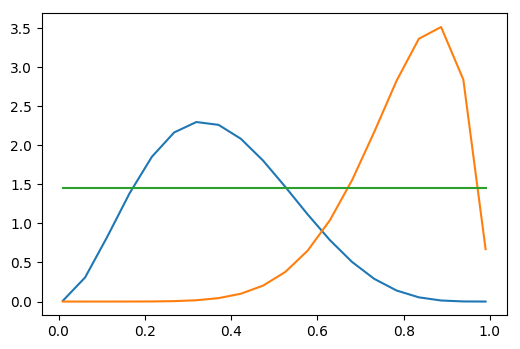

In [3]:
def beta_likelihood_ratio(s, a0, b0, a1, b1):
    """Equation LR(s; a0,b0,a1,b1) Section 3.1"""
    a = a1 - a0
    b = b0 - b1
    k = beta.pdf(s, a1, b1)/beta.pdf(s, a0, b0)
    numerator = ((s**a)/((1 - s)**b))
    print('Numerator')
    print numerator
    print('Denominator K')
    print k
    print('Likelihood ratio')
    print np.divide(numerator, k)
    return numerator / k

s = np.linspace(0.01, 0.99, 20)

plt.plot(s, beta.pdf(s, a0, b0))
plt.plot(s, beta.pdf(s, a1, b1))
plt.plot(s, beta_likelihood_ratio(s, a0, b0, a1, b1))